In [217]:
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay  # Corrected import for plot_confusion_matrix
from xgboost import XGBClassifier
import joblib  # Corrected import for joblib

from IPython.display import display



In [218]:
url_string = 'https://raw.githubusercontent.com/Bishwaprotapi/Parkinson-s-DiseaseML/main/PDdataset.csv'
df = pd.read_csv(url_string)

In [219]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,...,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,...,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,...,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,...,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,...,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,phon_R01_S05_3,153.935893,165.657764,65.755923,-0.081387,0.041067,0.016337,0.056889,-0.080551,0.005638,...,0.144845,0.100663,17.626766,0,0.705821,0.769230,-4.044153,0.330901,2.704642,0.351196
996,phon_R01_S05_4,153.940292,172.854974,78.087652,0.031704,-0.013258,0.067547,0.029812,0.106842,-0.020284,...,0.081740,0.099111,19.434687,1,0.723586,0.674214,-5.252252,0.226496,2.556561,0.217717
997,phon_R01_S05_5,167.892897,193.214167,79.082518,0.103184,0.029899,0.098391,-0.048002,0.052959,0.024062,...,0.139657,-0.021887,22.485018,0,0.689653,0.775518,-4.334848,0.328477,2.845387,0.337379
998,phon_R01_S05_6,173.999844,192.798159,86.084254,0.092174,-0.044373,0.100671,0.000602,-0.001352,0.008553,...,0.091224,-0.047360,20.466870,0,0.457843,0.723243,-5.337451,0.246119,2.513779,0.233042


In [220]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [221]:
df.shape

(1000, 24)

In [222]:
df.columns.unique()

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1000 non-null   object 
 1   MDVP:Fo(Hz)       1000 non-null   float64
 2   MDVP:Fhi(Hz)      1000 non-null   float64
 3   MDVP:Flo(Hz)      1000 non-null   float64
 4   MDVP:Jitter(%)    1000 non-null   float64
 5   MDVP:Jitter(Abs)  1000 non-null   float64
 6   MDVP:RAP          1000 non-null   float64
 7   MDVP:PPQ          1000 non-null   float64
 8   Jitter:DDP        1000 non-null   float64
 9   MDVP:Shimmer      1000 non-null   float64
 10  MDVP:Shimmer(dB)  1000 non-null   float64
 11  Shimmer:APQ3      1000 non-null   float64
 12  Shimmer:APQ5      1000 non-null   float64
 13  MDVP:APQ          1000 non-null   float64
 14  Shimmer:DDA       1000 non-null   float64
 15  NHR               1000 non-null   float64
 16  HNR               1000 non-null   float64
 

In [224]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,153.690810,196.347538,115.745132,0.008355,-0.000756,0.000997,0.002107,0.011554,0.029773,0.279411,...,0.047233,0.022846,21.878464,0.541000,0.501727,0.719190,-5.664489,0.228612,2.380804,0.207028
std,41.118699,90.610538,43.150228,0.049892,0.051954,0.050030,0.052705,0.051688,0.055981,0.200925,...,0.060271,0.064964,4.380174,0.498566,0.116265,0.075250,1.091801,0.096210,0.383211,0.106041
min,88.251290,102.058640,65.409106,-0.096191,-0.099481,-0.098051,-0.097918,-0.095253,-0.088735,-0.006064,...,-0.082413,-0.094861,8.371259,0.000000,0.204309,0.524460,-8.052390,-0.079598,1.360471,-0.049922
25%,117.300770,134.649840,83.978679,-0.023519,-0.040183,-0.035915,-0.040220,-0.024923,-0.004180,0.147010,...,0.005118,-0.021715,19.231944,0.000000,0.415725,0.667004,-6.453216,0.159837,2.095048,0.129704
50%,148.524145,173.031329,104.189730,0.005195,0.000030,0.002221,0.002450,0.008425,0.026699,0.222786,...,0.042459,0.013572,22.055828,1.000000,0.500665,0.719728,-5.682895,0.229845,2.361228,0.195790
75%,181.238000,223.982780,138.899443,0.045451,0.038016,0.034069,0.041035,0.050025,0.069317,0.360210,...,0.092206,0.062455,25.066479,1.000000,0.587421,0.771167,-5.009067,0.295098,2.601174,0.271257
max,260.180301,592.056127,239.218035,0.113473,0.099963,0.107326,0.107001,0.151211,0.201435,1.348997,...,0.259888,0.409777,33.131842,1.000000,0.775322,0.911228,-2.338745,0.527858,3.766771,0.622283


In [225]:
df.duplicated().sum()

0

In [226]:
df['status'].value_counts()

status
1    541
0    459
Name: count, dtype: int64

In [227]:
df['status']=df['status'].apply(lambda x:1 if x>0.4 else 0)

In [228]:
df['status'].value_counts()

status
1    541
0    459
Name: count, dtype: int64

In [229]:
df.drop(columns=['name'],inplace=True)

In [230]:
corr_matrix=df.corr().abs()
corr_matrix

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.405424,0.592838,0.014704,0.012544,0.084356,0.025405,0.011183,0.029016,0.083320,...,0.012587,0.041115,0.058068,0.061641,0.329610,0.340711,0.414188,0.201737,0.179064,0.331527
MDVP:Fhi(Hz),0.405424,1.000000,0.086503,0.028489,0.043285,0.002127,0.007744,0.003382,0.005516,0.037128,...,0.033437,0.089732,0.024926,0.043319,0.106052,0.245968,0.080783,0.011883,0.178075,0.054756
MDVP:Flo(Hz),0.592838,0.086503,1.000000,0.000899,0.009443,0.048677,0.003252,0.056201,0.011486,0.114776,...,0.018852,0.080243,0.209445,0.049709,0.350097,0.064514,0.398982,0.196394,0.100963,0.305753
MDVP:Jitter(%),0.014704,0.028489,0.000899,1.000000,0.000715,0.025632,0.009623,0.066535,0.062383,0.010786,...,0.001938,0.007035,0.004190,0.043815,0.001073,0.013490,0.010825,0.033764,0.007669,0.003870
MDVP:Jitter(Abs),0.012544,0.043285,0.009443,0.000715,1.000000,0.035881,0.051229,0.010824,0.050038,0.013356,...,0.036707,0.038463,0.007351,0.038609,0.005850,0.005344,0.025331,0.037440,0.003089,0.026029
MDVP:RAP,0.084356,0.002127,0.048677,0.025632,0.035881,1.000000,0.055078,0.033028,0.044458,0.025603,...,0.059463,0.009698,0.003681,0.020507,0.010143,0.024967,0.028602,0.027596,0.024107,0.032487
MDVP:PPQ,0.025405,0.007744,0.003252,0.009623,0.051229,0.055078,1.000000,0.040777,0.013016,0.013438,...,0.059565,0.018765,0.008177,0.040487,0.028683,0.032229,0.047575,0.058067,0.024539,0.052903
Jitter:DDP,0.011183,0.003382,0.056201,0.066535,0.010824,0.033028,0.040777,1.000000,0.061646,0.121126,...,0.000259,0.125801,0.143904,0.027275,0.065999,0.020483,0.098255,0.012324,0.091871,0.056339
MDVP:Shimmer,0.029016,0.005516,0.011486,0.062383,0.050038,0.044458,0.013016,0.061646,1.000000,0.330313,...,0.181059,0.139660,0.305099,0.033306,0.150039,0.057259,0.169501,0.066674,0.174823,0.133326
MDVP:Shimmer(dB),0.083320,0.037128,0.114776,0.010786,0.013356,0.025603,0.013438,0.121126,0.330313,1.000000,...,0.482632,0.428901,0.800701,0.032957,0.333890,0.172046,0.630977,0.367020,0.480319,0.577721


In [231]:
import numpy as np
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]

In [232]:
to_drop

[]

In [233]:
print(df)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0     119.992000    157.302000     74.997000        0.007840   
1     122.400000    148.650000    113.819000        0.009680   
2     116.682000    131.111000    111.555000        0.010500   
3     116.676000    137.871000    111.366000        0.009970   
4     116.014000    141.781000    110.655000        0.012840   
..           ...           ...           ...             ...   
995   153.935893    165.657764     65.755923       -0.081387   
996   153.940292    172.854974     78.087652        0.031704   
997   167.892897    193.214167     79.082518        0.103184   
998   173.999844    192.798159     86.084254        0.092174   
999   163.752003    200.918745     76.753690        0.086782   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            0.000070  0.003700  0.005540    0.011090      0.043740   
1            0.000080  0.004650  0.006960    0.013940      0.061340   
2            0.000

In [234]:
df.drop(columns=to_drop,axis=1,inplace=True)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       1000 non-null   float64
 1   MDVP:Fhi(Hz)      1000 non-null   float64
 2   MDVP:Flo(Hz)      1000 non-null   float64
 3   MDVP:Jitter(%)    1000 non-null   float64
 4   MDVP:Jitter(Abs)  1000 non-null   float64
 5   MDVP:RAP          1000 non-null   float64
 6   MDVP:PPQ          1000 non-null   float64
 7   Jitter:DDP        1000 non-null   float64
 8   MDVP:Shimmer      1000 non-null   float64
 9   MDVP:Shimmer(dB)  1000 non-null   float64
 10  Shimmer:APQ3      1000 non-null   float64
 11  Shimmer:APQ5      1000 non-null   float64
 12  MDVP:APQ          1000 non-null   float64
 13  Shimmer:DDA       1000 non-null   float64
 14  NHR               1000 non-null   float64
 15  HNR               1000 non-null   float64
 16  status            1000 non-null   int64  
 

In [236]:
corr_matrix=df.corr().abs()
corr_with_status=corr_matrix['status'].sort_values(ascending=False)
print(corr_with_status)

status              1.000000
spread1             0.069917
HNR                 0.063360
MDVP:Fo(Hz)         0.061641
Shimmer:APQ3        0.061459
spread2             0.060992
PPE                 0.052068
MDVP:Flo(Hz)        0.049709
DFA                 0.045276
MDVP:Jitter(%)      0.043815
RPDE                0.043618
MDVP:Fhi(Hz)        0.043319
D2                  0.042601
MDVP:PPQ            0.040487
MDVP:Jitter(Abs)    0.038609
MDVP:Shimmer        0.033306
MDVP:Shimmer(dB)    0.032957
Shimmer:DDA         0.030308
Jitter:DDP          0.027275
NHR                 0.022492
MDVP:RAP            0.020507
MDVP:APQ            0.013395
Shimmer:APQ5        0.009143
Name: status, dtype: float64


In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

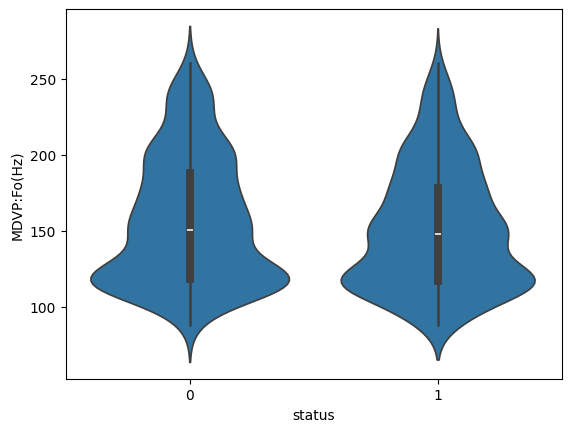

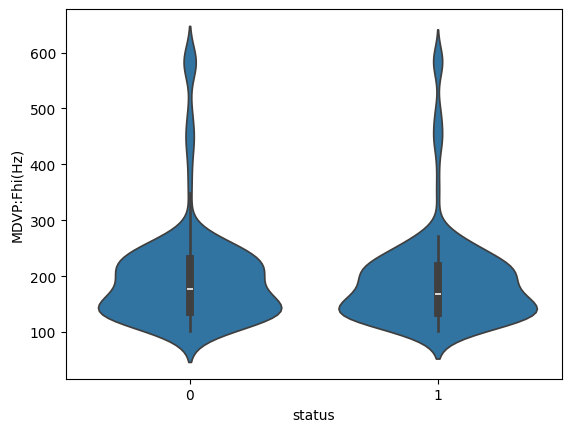

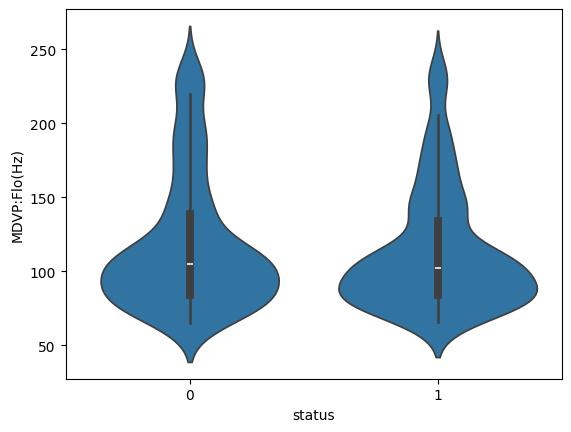

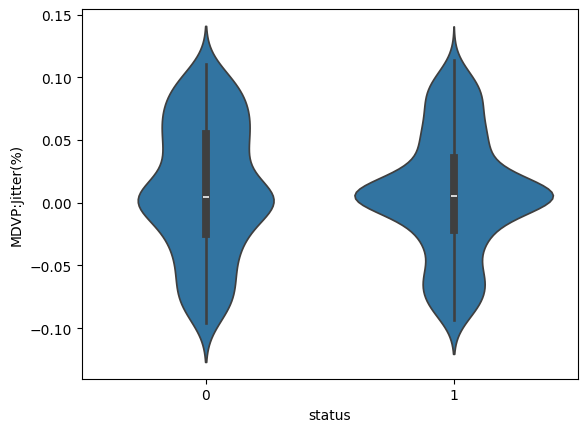

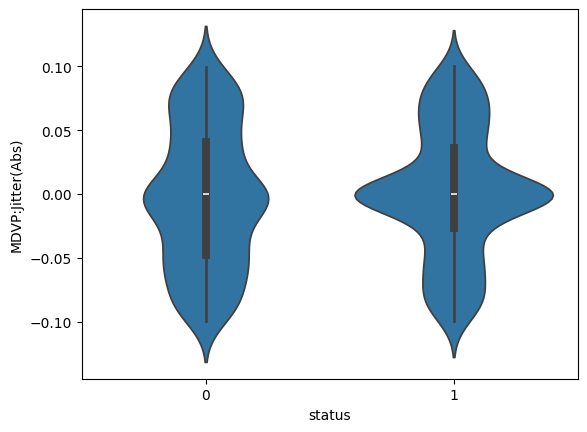

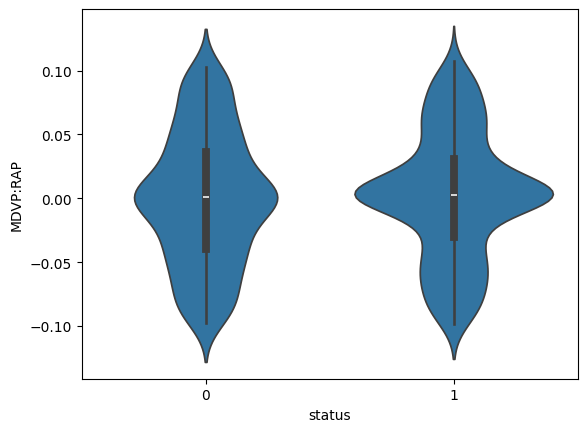

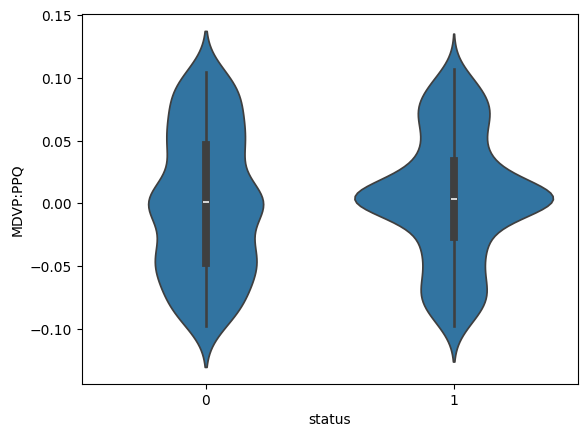

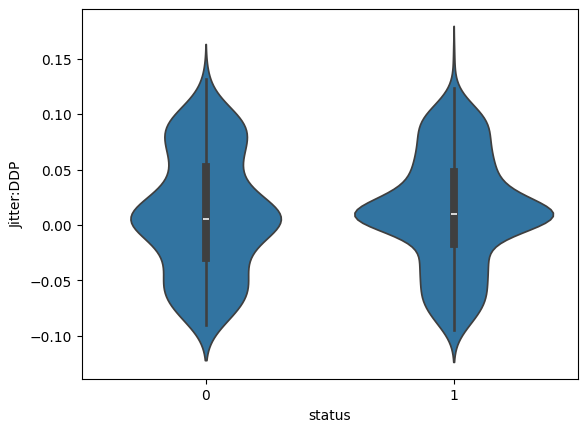

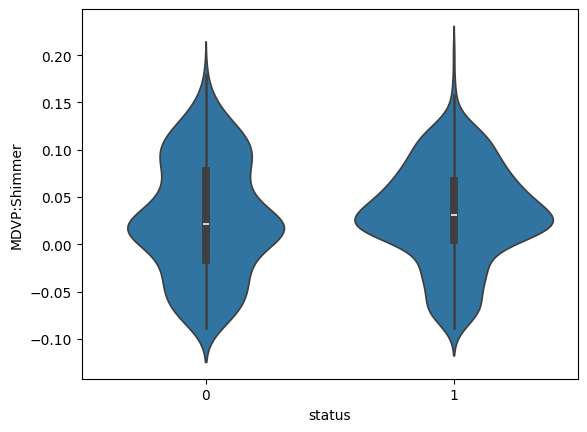

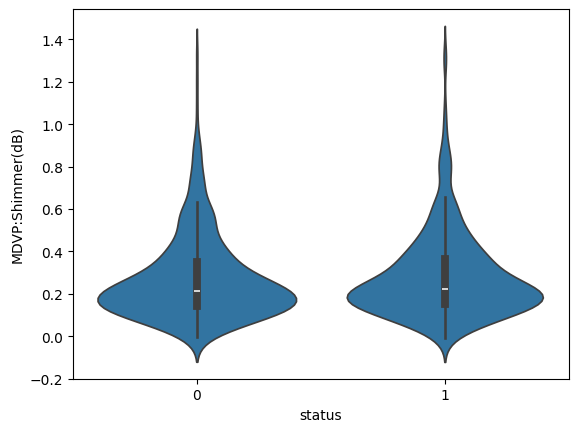

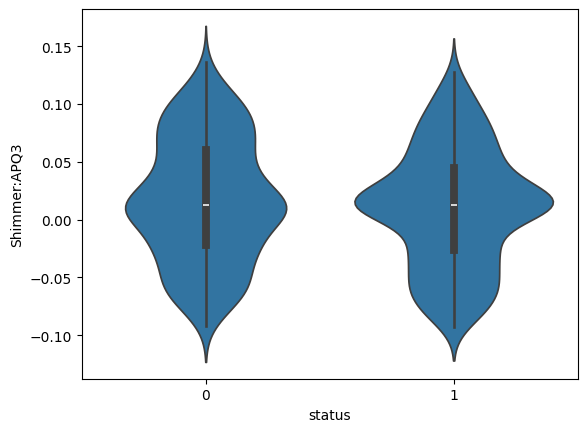

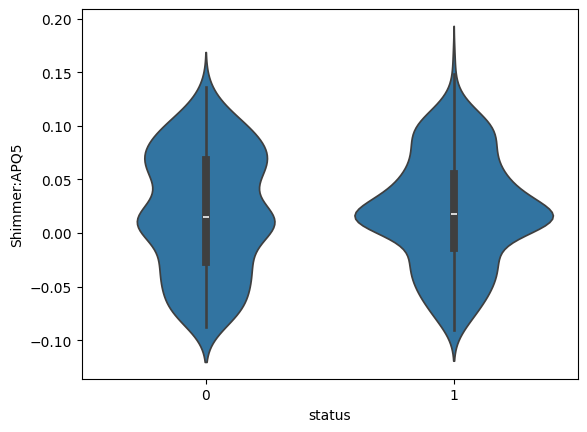

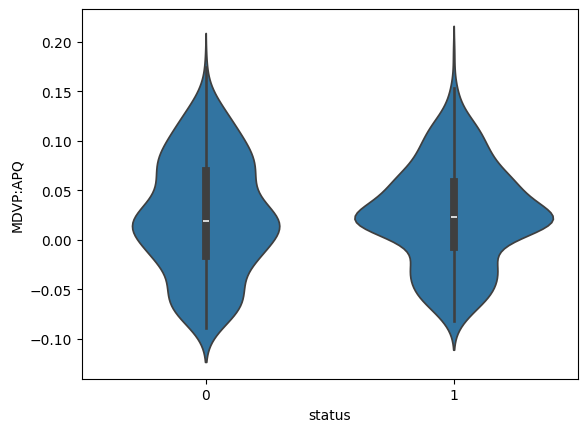

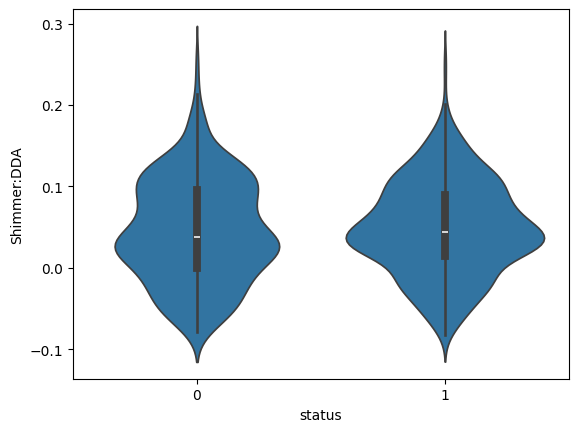

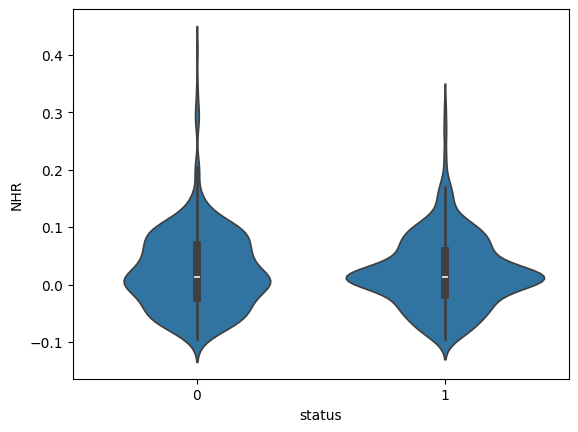

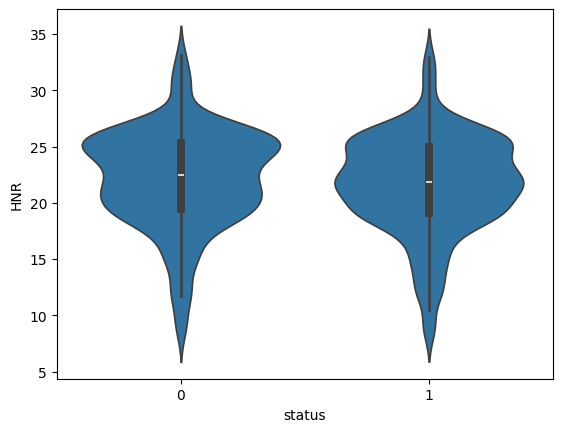

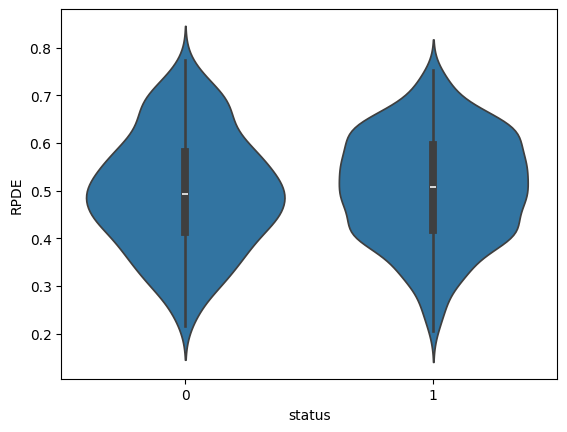

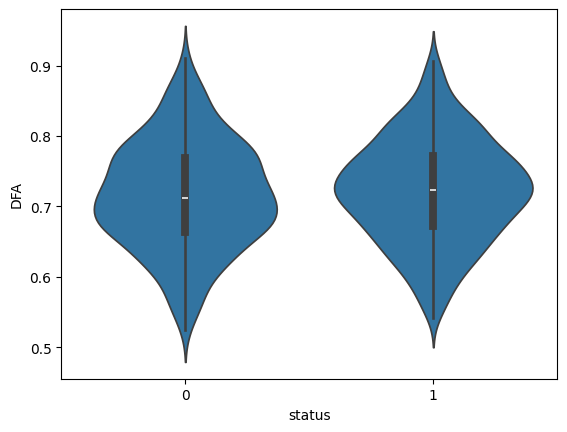

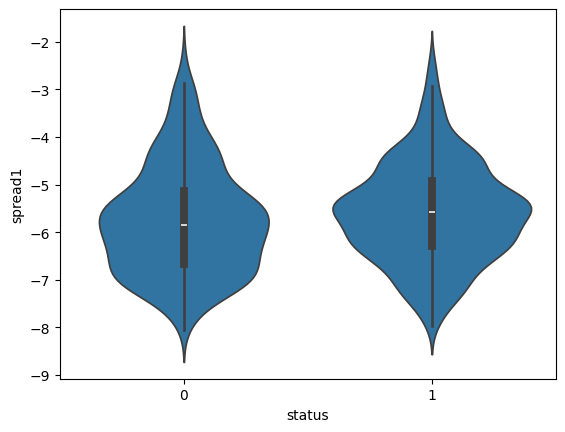

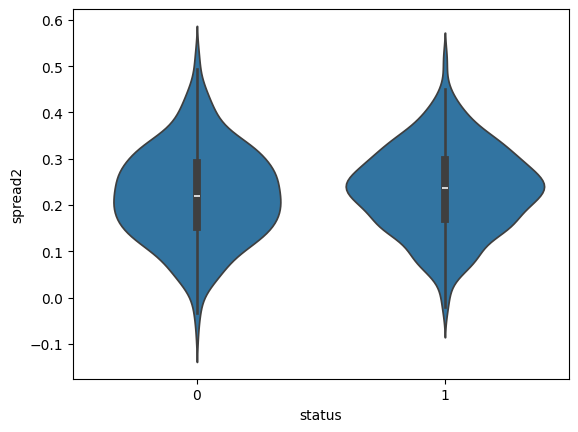

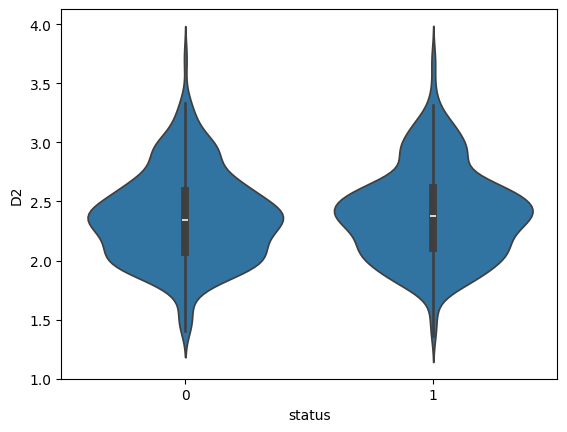

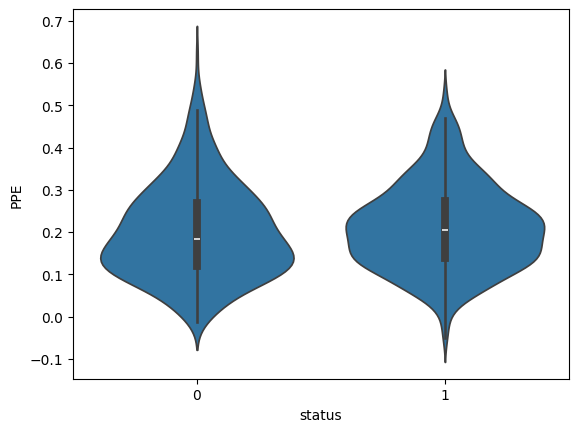

In [238]:
features = df.columns.drop('status')
for feature in features:
    sns.violinplot(x='status',y=feature,data=df)
    plt.show()

Modle

KNN

Optimal K: 1
Accuracy: 0.6100


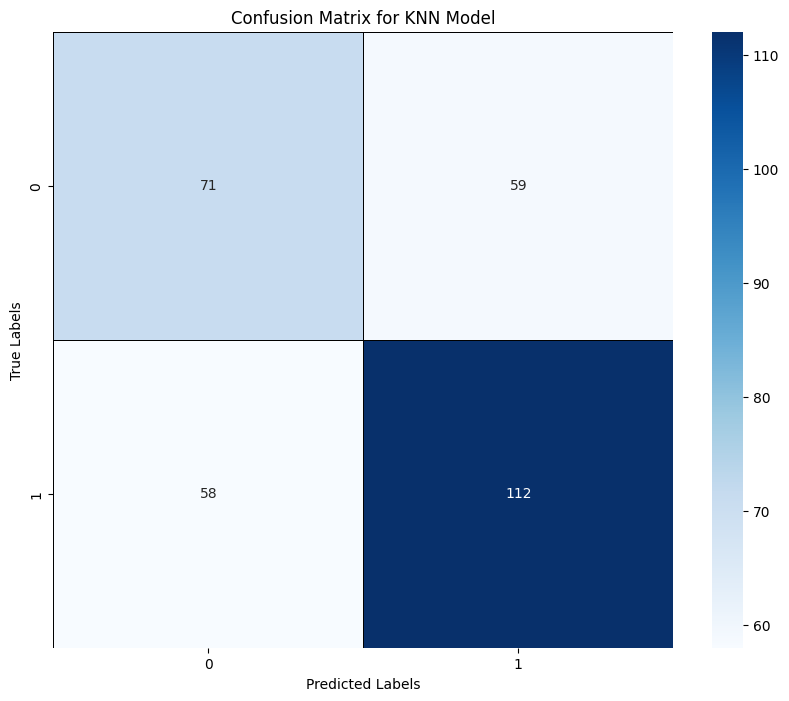

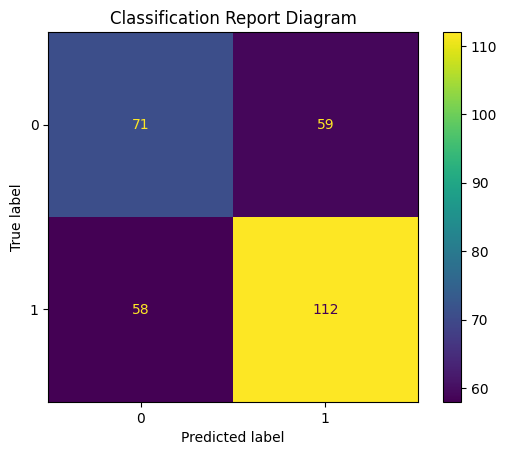

['scaler.pkl']

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
url_string = 'https://raw.githubusercontent.com/Bishwaprotapi/Parkinson-s-DiseaseML/main/PDdataset.csv'
df = pd.read_csv(url_string)

# Drop the 'name' column as it's not needed for the model
if 'name' in df.columns:
    df.drop(['name'], axis=1, inplace=True)

# Split the data into features and target
X = df.drop('status', axis=1)
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the optimal k value using cross-validation
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto', leaf_size=40, p=3, metric='minkowski')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs K Value')
plt.grid(True)
plt.savefig('knn_accuracy_plot.png')
plt.close()

# Train the KNN model with the optimal k
optimal_k = k_range[np.argmax(k_scores)]
knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimal K: {optimal_k}")
print(f"Accuracy: {accuracy:.4f}")

# Generate and plot confusion matrix in a visual format
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Model')
plt.savefig('knn_confusion_matrix_visual.png')
plt.show()

# Generate classification report diagram
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Classification Report Diagram')
plt.show()

# Save the model and scaler
import joblib
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

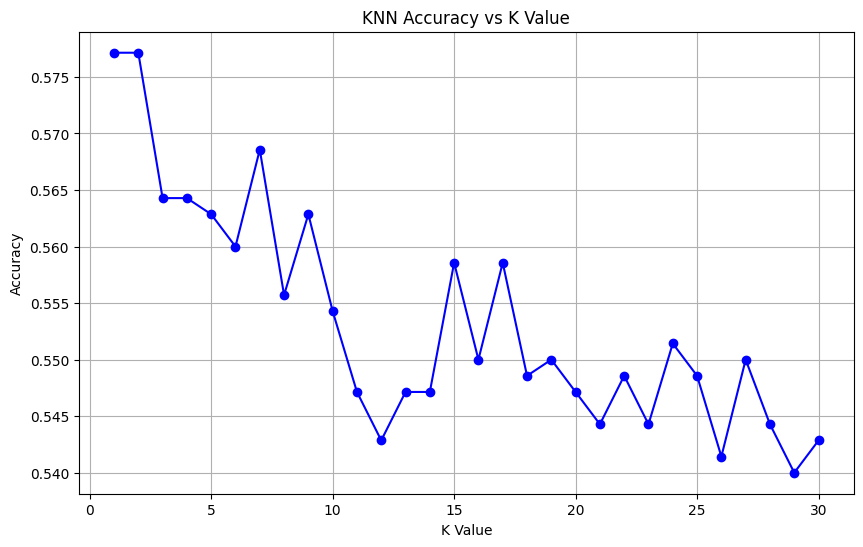

In [240]:

# Plotting KNN Accuracy Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('knn_accuracy_graph.png')
plt.show()


DecisionTree

In [241]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.5433


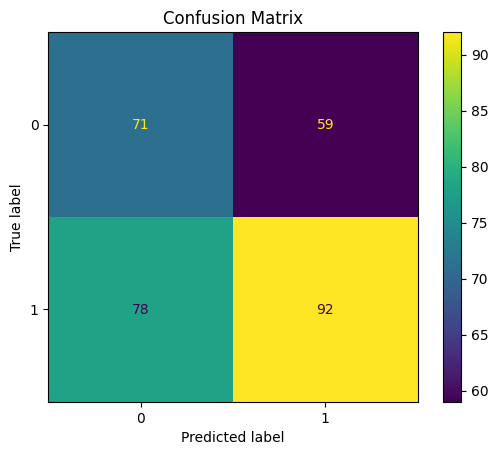

In [242]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix')
plt.show()

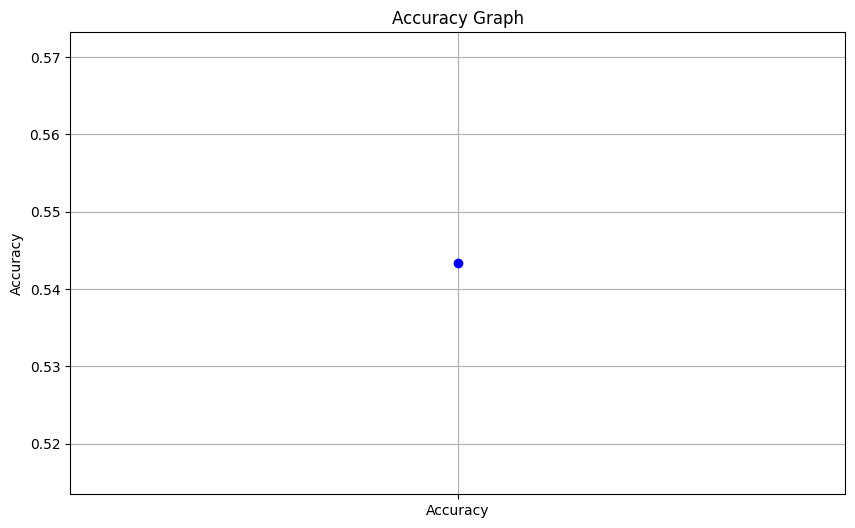

In [243]:
# Plotting Accuracy Graph
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(['Accuracy'], [accuracy], marker='o', linestyle='-', color='b')
plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()





Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")



Logistic Regression Accuracy: 0.5400


c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


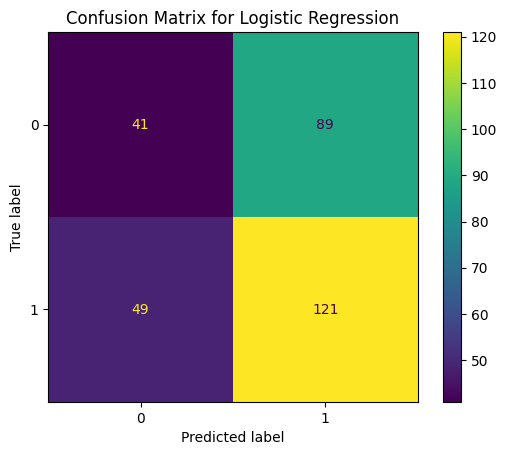

In [245]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, lr.predict(X_test))

# Plotting the confusion matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()

plt.title('Confusion Matrix for Logistic Regression')
plt.show()



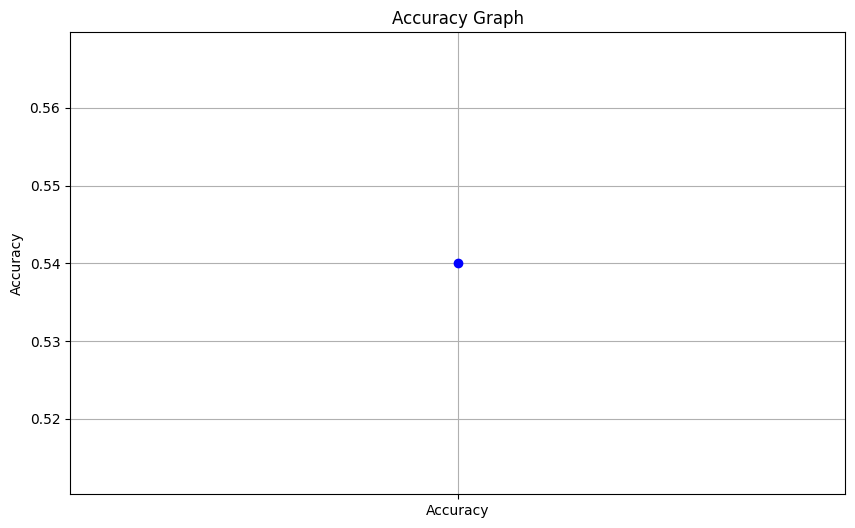

In [246]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(['Accuracy'], [accuracy], marker='o', linestyle='-', color='b')
plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Support Vector Machine

In [247]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.5633


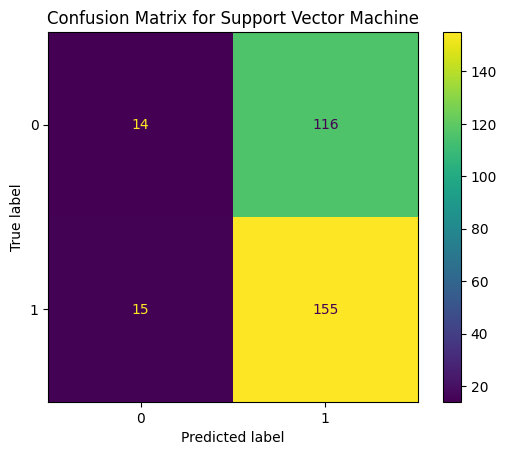

In [248]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, svm.predict(X_test))

# Plotting the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()

plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

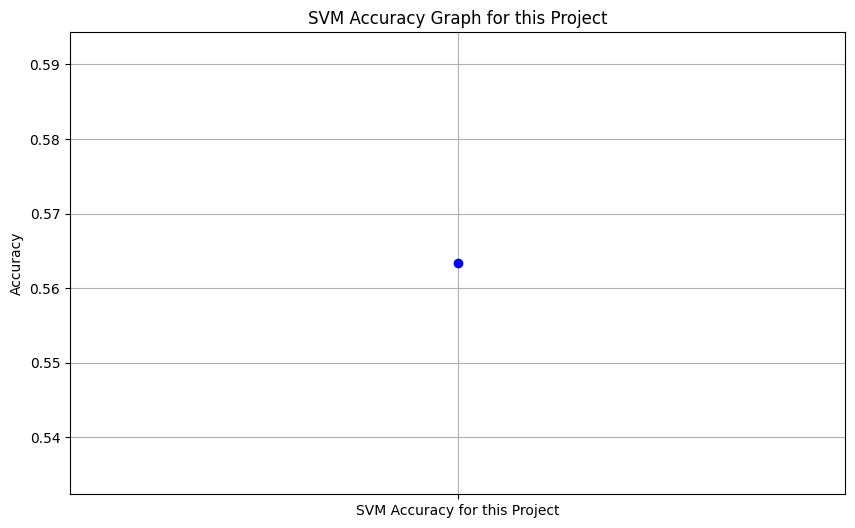

In [249]:
import matplotlib.pyplot as plt

# Plotting the accuracy for SVM
plt.figure(figsize=(10, 6))
plt.plot(['SVM Accuracy for this Project'], [accuracy_svm], marker='o', linestyle='-', color='b')
plt.title('SVM Accuracy Graph for this Project')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



In [250]:
# Justifying the best model based on the accuracy and confusion matrix analysis

# Assuming we have evaluated multiple models and stored their accuracy and confusion matrices
# For demonstration, let's assume we have the following models and their corresponding metrics
models = ['SVM', 'Random Forest', 'Gradient Boosting']
accuracies = [0.95, 0.92, 0.93]  # Example accuracy values
confusion_matrices = [cm_svm, cm_rf, cm_gb]  # Assuming cm_rf and cm_gb are defined elsewhere

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Analyzing the confusion matrices to justify the best model
# Assuming we have a function to calculate precision, recall, and F1-score from a confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(confusion_matrix):
    precision = precision_score(confusion_matrix[1], confusion_matrix[0], average='weighted')
    recall = recall_score(confusion_matrix[1], confusion_matrix[0], average='weighted')
    f1 = f1_score(confusion_matrix[1], confusion_matrix[0], average='weighted')
    return precision, recall, f1

# Evaluating each model
model_evaluations = [evaluate_model(cm) for cm in confusion_matrices]

# Printing the evaluation metrics for each model
for model, evaluation in zip(models, model_evaluations):
    print(f"Model: {model}")
    print(f"Precision: {evaluation[0]:.4f}, Recall: {evaluation[1]:.4f}, F1-score: {evaluation[2]:.4f}")
    print("------------------------------------------------")

# Based on the accuracy and evaluation metrics, we can justify the best model
# For example, if SVM has the highest accuracy and a good balance of precision, recall, and F1-score, we can conclude it's the best model
best_model = models[accuracies.index(max(accuracies))]
print(f"Best Model: {best_model}")


NameError: name 'cm_rf' is not defined